## import libraries

In [479]:
import pandas as pd
from ast import literal_eval
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN

## Read dataset

In [480]:
df = pd.read_csv('imdb.csv', index_col=False)
df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www

In [481]:
df.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

## preprocess and clean dataset

In [482]:
#missing value for each column
df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [483]:
# df.production_companies[7506]

In [484]:
df.loc[0]

id                                                                       1
belongs_to_collection    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
budget                                                            14000000
genres                                      [{'id': 35, 'name': 'Comedy'}]
homepage                                                               NaN
imdb_id                                                          tt2637294
original_language                                                       en
original_title                                      Hot Tub Time Machine 2
overview                 When Lou, who has become the "father of the In...
popularity                                                        6.575393
poster_path                               /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
production_companies     [{'name': 'Paramount Pictures', 'id': 4}, {'na...
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date             

In [485]:
df.genres[1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [486]:
df = df.dropna(subset=['genres'])

In [487]:
# df_genres = pd.DataFrame()
# df_genres['genres'] = df['genres'].apply(lambda c: literal_eval(c)) 


In [488]:
df_genres = pd.DataFrame(df)
df_genres['genres'] = df['genres'].apply(lambda c: literal_eval(c)) 
df.head(50)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [489]:
df_genres = df_genres.explode('genres').reset_index(drop=True)
df_genres

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"{'id': 35, 'name': 'Comedy'}",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"{'id': 35, 'name': 'Comedy'}",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"{'id': 18, 'name': 'Drama'}",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"{'id': 10751, 'name': 'Family'}",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
4,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"{'id': 10749, 'name': 'Romance'}",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,2999,NaN,42000000,"{'id': 35, 'name': 'Comedy'}",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
7507,2999,NaN,42000000,"{'id': 10749, 'name': 'Romance'}",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
7508,3000,NaN,35000000,"{'id': 53, 'name': 'Thriller'}",http://www.abductionthefilm.com

In [490]:
df_genres1 = df_genres['genres'].apply(pd.Series)
df_genres1 = df_genres1.rename({'id': 'genres_id', 'name': 'genres_name'}, axis=1)

In [491]:
df_final = pd.concat([df_genres, df_genres1], axis = 1).drop('genres', axis = 1)
df_final

,id,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_id,genres_name
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,35,Comedy
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,35,Comedy
2,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,18,Drama
3,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,10751,Family
4,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,10749,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,2999,NaN,42000000,http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,/nIY4kvJTTnxoBR0wycrXng5MOYs.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,35,Comedy
7507,2999,NaN,42000000,http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,/nIY4kvJTTnxoBR0wycrXng5MOYs.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,10749,Romance
7508,3000,NaN,35000000,http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young m

#### Which are the genres with the highest number of movies?

In [492]:
df_final.genres_name.value_counts()

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
War                 100
Music               100
Documentary          87
Western              43
Foreign              31
TV Movie              1
Name: genres_name, dtype: int64

<AxesSubplot:>

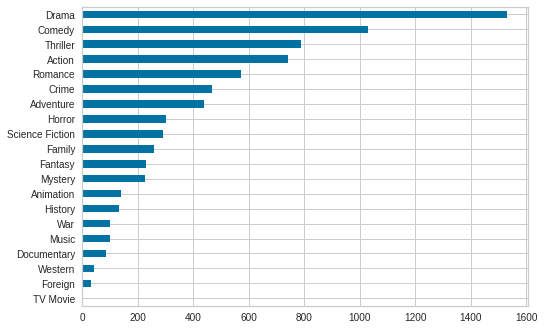

In [493]:
df_final.genres_name.value_counts().sort_values().plot(kind = 'barh')

In [494]:
df_final.columns

Index(['id', 'belongs_to_collection', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'genres_id',
       'genres_name'],
      dtype='object')

### Which are the genres with the highest average revenue/budget ratio for a movie? 

In [495]:
df2= df_final[['id','original_title','genres_id',
       'genres_name','budget','revenue']]
df2

,id,original_title,genres_id,genres_name,budget,revenue
0,1,Hot Tub Time Machine 2,35,Comedy,14000000,12314651
1,2,The Princess Diaries 2: Royal Engagement,35,Comedy,40000000,95149435
2,2,The Princess Diaries 2: Royal Engagement,18,Drama,40000000,95149435
3,2,The Princess Diaries 2: Royal Engagement,10751,Family,40000000,95149435
4,2,The Princess Diaries 2: Royal Engagement,10749,Romance,40000000,95149435
...,...,...,...,...,...,...
7506,2999,Along Came Polly,35,Comedy,42000000,171963386
7507,2999,Along Came Polly,10749,Romance,42000000,171963386
7508,3000,Abduction,53,Thriller,35000000,82087155
7509,3000,Abduction,28,Action,35000000,82087155


In [496]:
df2['ratio'] = df2['revenue']/ df2['budget']
df2

/tmp/ipykernel_6811/2970859730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ratio'] = df2['revenue']/ df2['budget']


,id,original_title,genres_id,genres_name,budget,revenue,ratio
0,1,Hot Tub Time Machine 2,35,Comedy,14000000,12314651,0.879618
1,2,The Princess Diaries 2: Royal Engagement,35,Comedy,40000000,95149435,2.378736
2,2,The Princess Diaries 2: Royal Engagement,18,Drama,40000000,95149435,2.378736
3,2,The Princess Diaries 2: Royal Engagement,10751,Family,40000000,95149435,2.378736
4,2,The Princess Diaries 2: Royal Engagement,10749,Romance,40000000,95149435,2.378736
...,...,...,...,...,...,...,...
7506,2999,Along Came Polly,35,Comedy,42000000,171963386,4.094366
7507,2999,Along Came Polly,10749,Romance,42000000,171963386,4.094366
7508,3000,Abduction,53,Thriller,35000000,82087155,2.345347
7509,3000,Abduction,28,Action,35000000,82087155,2.345347


In [497]:
df3 = df2[df2.budget!=0]

In [498]:
df3

,id,original_title,genres_id,genres_name,budget,revenue,ratio
0,1,Hot Tub Time Machine 2,35,Comedy,14000000,12314651,0.879618
1,2,The Princess Diaries 2: Royal Engagement,35,Comedy,40000000,95149435,2.378736
2,2,The Princess Diaries 2: Royal Engagement,18,Drama,40000000,95149435,2.378736
3,2,The Princess Diaries 2: Royal Engagement,10751,Family,40000000,95149435,2.378736
4,2,The Princess Diaries 2: Royal Engagement,10749,Romance,40000000,95149435,2.378736
...,...,...,...,...,...,...,...
7506,2999,Along Came Polly,35,Comedy,42000000,171963386,4.094366
7507,2999,Along Came Polly,10749,Romance,42000000,171963386,4.094366
7508,3000,Abduction,53,Thriller,35000000,82087155,2.345347
7509,3000,Abduction,28,Action,35000000,82087155,2.345347


In [499]:
mean_df = df3.groupby(['genres_name'])['ratio'].mean()

In [500]:
mean_df.sort_values(ascending=False)

genres_name
War                50576.236482
History            40001.024548
Comedy             17435.373985
Drama              12589.365396
Family              5096.335668
Horror              4195.850437
Adventure           2733.341129
Romance             2554.460461
Action              1671.199036
Thriller            1577.204971
Mystery               98.919559
TV Movie               8.400000
Music                  5.562118
Crime                  4.437686
Western                4.357398
Science Fiction        3.648028
Animation              3.325127
Fantasy                3.300762
Foreign                2.848099
Documentary            2.538669
Name: ratio, dtype: float64

### Sort the production companies by the number of movies made. 

In [501]:
df_production_companies = df.dropna(subset=['production_companies'])

In [502]:
df_production_companies['production_companies'] = df_production_companies['production_companies'].apply(lambda c: literal_eval(c)) 

/tmp/ipykernel_6811/1465228220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_companies['production_companies'] = df_production_companies['production_companies'].apply(lambda c: literal_eval(c))


In [503]:
# df['production_companies'] = pd.DataFrame(df.production_companies)
# df.head()

In [504]:
df_production_companies = df_production_companies.explode('production_companies').reset_index(drop=True)
df_production_companies

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
3,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
4,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8090,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155
8091,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155
8092,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_

In [505]:
df_production_companies1 = df_production_companies['production_companies'].apply(pd.Series)
df_production_companies1 = df_production_companies1.rename({'id': 'comp_id', 'name': 'comp_name'}, axis=1)

In [506]:
df_production_companies1

,comp_name,comp_id
0,Paramount Pictures,4
1,United Artists,60
2,Metro-Goldwyn-Mayer (MGM),8411
3,Walt Disney Pictures,2
4,Bold Films,2266
...,...,...
8090,Vertigo Entertainment,829
8091,Gotham Group,3672
8092,Tailor Made,24557
8093,Mango Farms,24558


In [507]:
df_t = pd.concat([df_production_companies, df_production_companies1], axis = 1).drop('production_companies', axis = 1)
df_t

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,comp_name,comp_id
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Paramount Pictures,4
1,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,United Artists,60
2,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Metro-Goldwyn-Mayer (MGM),8411
3,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Walt Disney Pictures,2
4,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Bold Films,2266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8090,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,Vertigo Entertainment,829
8091,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,Gotham Group,3672
8092,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover

In [508]:
df_t.comp_name.value_counts()

Warner Bros.                              202
Universal Pictures                        188
Paramount Pictures                        161
Twentieth Century Fox Film Corporation    138
Columbia Pictures                          91
                                         ... 
Videofilms                                  1
Riofilm                                     1
Zero Gravity Management                     1
Pierce/Williams Entertainment               1
Quick Six Entertainment                     1
Name: comp_name, Length: 3695, dtype: int64

### Provide a plot of average revenue/budget ratio in different years.

In [509]:
df.status.value_counts()

Released    2989
Rumored        4
Name: status, dtype: int64

In [510]:
df_year = df[df.status != 'Rumored']

In [511]:
df_year = df_year[['id', 'revenue', 'budget', 'release_date']]
df_year['release_date'] =  pd.to_datetime(df['release_date'])

In [512]:
df_year

,id,revenue,budget,release_date
0,1,12314651,14000000,2015-02-20
1,2,95149435,40000000,2004-08-06
2,3,13092000,3300000,2014-10-10
3,4,16000000,1200000,2012-03-09
4,5,3923970,0,2009-02-05
...,...,...,...,...
2995,2996,1596687,0,1994-04-22
2996,2997,180590,0,2013-03-28
2997,2998,89456761,65000000,1996-10-11
2998,2999,171963386,42000000,2004-01-16


In [513]:
df_year['year'] = df_year['release_date'].dt.year

In [514]:
df_year.release_date.sort_values()

2528   1972-01-13
2864   1972-02-19
1893   1972-03-12
1093   1972-03-14
2138   1972-06-29
          ...    
2417   2071-06-29
1628   2071-10-09
351    2071-12-13
2309   2071-12-18
2574   2071-12-29
Name: release_date, Length: 2989, dtype: datetime64[ns]

In [515]:
df_year = df_year[['year','budget','revenue']]
df_year

,year,budget,revenue
0,2015,14000000,12314651
1,2004,40000000,95149435
2,2014,3300000,13092000
3,2012,1200000,16000000
4,2009,0,3923970
...,...,...,...
2995,1994,0,1596687
2996,2013,0,180590
2997,1996,65000000,89456761
2998,2004,42000000,171963386


In [516]:
df_year = df_year[df_year.budget!=0]

In [517]:
df_year.sort_values(by='year', ascending=False)

,year,budget,revenue
1628,2071,1800000,41158757
2417,2071,3000000,4000000
351,2071,7200000,116019547
790,2071,1300000,72266306
1525,2071,777000,2437000
...,...,...,...
2528,1972,6000000,7500000
1093,1972,6000000,245066411
2864,1972,410000,100
817,1972,100000,22000000


In [518]:
# the years are bigger than 2022 so i remove them :)
df_year = df_year[df_year.year < 2022]
df_year.sort_values(by='year', ascending=False)

,year,budget,revenue
1763,2021,250000,2500000
1866,2017,125000000,407778013
391,2017,7075038,9868942
1783,2017,97000000,616801808
1730,2017,4000000,1440000
...,...,...,...
2528,1972,6000000,7500000
2864,1972,410000,100
1893,1972,12000,6000000
2138,1972,1700000,9700000


In [519]:
df_year['ratio'] = df_year['revenue']/ df_year['budget']
df_year

,year,budget,revenue,ratio
0,2015,14000000,12314651,0.879618
1,2004,40000000,95149435,2.378736
2,2014,3300000,13092000,3.967273
3,2012,1200000,16000000,13.333333
5,1987,8000000,3261638,0.407705
...,...,...,...,...
2991,2001,13000000,91038276,7.002944
2993,2004,60000000,219417255,3.656954
2997,1996,65000000,89456761,1.376258
2998,2004,42000000,171963386,4.094366


In [520]:
mean_df_year = pd.DataFrame(df_year.groupby(['year'])['ratio'].mean())

In [521]:
mean_df_year

,ratio
year,
1972,113.816533
1973,12.420155
1974,24.336385
1975,46.419972
1976,24.588394
1977,19.637607
1978,13.551193
1979,9.674841
1980,12.719639


No handles with labels found to put in legend.


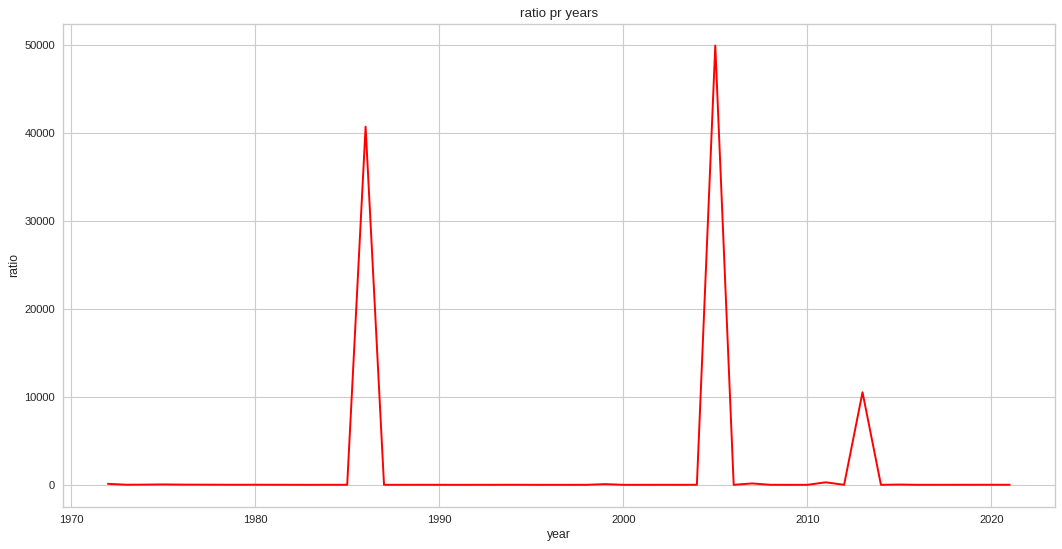

In [522]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)
plt.plot(mean_df_year.ratio, color = 'red')
plt.title('ratio pr years')
plt.xlabel('year')
plt.ylabel('ratio')
plt.legend()
plt.show()

### Group all movies into different subgroups based on budget, revenue and popularity.
(Drop the movies with budget or revenue lower than 10000, these are unknown values)

In [523]:
df_group = df[['budget', 'revenue', 'popularity']]
df_group

,budget,revenue,popularity
0,14000000,12314651,6.575393
1,40000000,95149435,8.248895
2,3300000,13092000,64.299990
3,1200000,16000000,3.174936
4,0,3923970,1.148070
...,...,...,...
2995,0,1596687,9.853270
2996,0,180590,3.727996
2997,65000000,89456761,14.482345
2998,42000000,171963386,15.725542


In [524]:
df_group.isnull().sum()

budget        0
revenue       0
popularity    0
dtype: int64

In [525]:
df_group = df_group.loc[(df_group["revenue"] > 10000) & (df_group["budget"] > 1000)]
df_group.reset_index(drop=True, inplace=True)
df_group

,budget,revenue,popularity
0,14000000,12314651,6.575393
1,40000000,95149435,8.248895
2,3300000,13092000,64.299990
3,1200000,16000000,3.174936
4,8000000,3261638,0.743274
...,...,...,...
2137,1135654,1213880,3.878515
2138,60000000,219417255,14.092373
2139,65000000,89456761,14.482345
2140,42000000,171963386,15.725542


In [526]:
df_group.describe()

,budget,revenue,popularity
count,2.142000e+03,2.142000e+03,2142.000000
mean,3.148975e+07,8.875099e+07,9.836230
std,4.048271e+07,1.566489e+08,13.860785
min,2.500000e+03,1.001800e+04,0.003013
25%,6.000000e+06,7.572796e+06,5.515556
50%,1.700000e+07,3.011534e+07,8.384303
75%,4.000000e+07,1.012832e+08,11.724694
max,3.800000e+08,1.519558e+09,294.337037


In [528]:
scaler = MinMaxScaler()
df_group[['budget', 'revenue', 'popularity']] = scaler.fit_transform(df_group[['budget', 'revenue', 'popularity']])
df_group

/home/sep/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,budget,revenue,popularity
0,0.036836,0.008098,0.022330
1,0.105257,0.062610,0.028015
2,0.008678,0.008609,0.218449
3,0.003151,0.010523,0.010777
4,0.021046,0.002140,0.002515
...,...,...,...
2137,0.002982,0.000792,0.013167
2138,0.157889,0.144390,0.047869
2139,0.171047,0.058864,0.049194
2140,0.110520,0.113161,0.053417


use elbow method for choose the best number of clusters

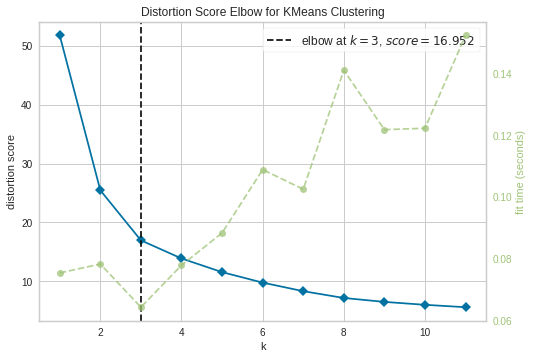

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [545]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_group)
visualizer.show()

In [546]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_group)

In [547]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)